In [1]:
#importing required libraries
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from datetime import datetime, timedelta

# 1. Data Preparation

In [2]:
#reading files
df = pd.read_excel(r"C:\Users\prash\Desktop\Job\PortCast_DataAnalyst_Assignment\results_2021-09-30_DA Assignment.xlsx")

In [3]:
df.head()

,vessel_live_info_id,timestamp_utc,scheduled_arrival_utc,estimated_arrival_utc,imo,port_code,actual_arrival_utc
0,4e1582e1-ea33-4977-b84e-886f0095bee4,2021-07-02T02:32:29Z,2021-09-05T18:30:00Z,2021-08-07T13:50:21.965794Z,9393307,INMUN,2021-08-31T08:45:09.54Z
1,a0b4c72a-a7ec-4888-b513-77c837b0b82d,2021-07-03T03:17:16Z,2021-09-05T18:30:00Z,2021-08-07T06:24:55.229106Z,9393307,INMUN,2021-08-31T08:45:09.54Z
2,4947dc14-3471-48bc-bee1-7ba82e301182,2021-07-04T02:53:17Z,2021-09-05T18:30:00Z,2021-08-07T20:52:36.357922Z,9393307,INMUN,2021-08-31T08:45:09.54Z
3,f90f626f-1933-4c46-8749-947c2a246e0b,2021-07-04T23:55:04Z,2021-09-05T18:30:00Z,2021-08-08T16:25:14.146273Z,9393307,INMUN,2021-08-31T08:45:09.54Z
4,7ff01141-9dab-41ef-b1b7-70abc29df3ea,2021-07-06T00:33:44Z,2021-09-05T18:30:00Z,2021-08-08T15:46:31.015292Z,9393307,INMUN,2021-08-31T08:45:09.54Z


In [4]:
df.info()
#Understanding data types and non null count , does not contain any numeric value to use describe() to understand the data.
#The dataset contains categorical value or datetime value or IDs

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6347 entries, 0 to 6346
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   vessel_live_info_id    6347 non-null   object
 1   timestamp_utc          6347 non-null   object
 2   scheduled_arrival_utc  6347 non-null   object
 3   estimated_arrival_utc  6347 non-null   object
 4   imo                    6347 non-null   int64 
 5   port_code              6347 non-null   object
 6   actual_arrival_utc     6347 non-null   object
dtypes: int64(1), object(6)
memory usage: 347.2+ KB


In [5]:
#converting date objects to datetime datatypes for easy calculations
df['estimated_arrival_utc'] = pd.to_datetime(df['estimated_arrival_utc'])
df['scheduled_arrival_utc'] = pd.to_datetime(df['scheduled_arrival_utc'])
df['actual_arrival_utc']=pd.to_datetime(df['actual_arrival_utc'])
df['timestamp_utc']=pd.to_datetime(df['timestamp_utc'])

In [6]:
#converting imo to string object from integer.
df['imo']=df.imo.astype('string')
df['imo'].dtype

string[python]

# 2. Data Cleaning

## 2.1 Checking for Null Values

In [7]:
df.isna().sum() #no null values

vessel_live_info_id      0
timestamp_utc            0
scheduled_arrival_utc    0
estimated_arrival_utc    0
imo                      0
port_code                0
actual_arrival_utc       0
dtype: int64

##              2.2 Checking for Duplicated Values

In [8]:
df.duplicated().sum() #checking no. of duplicated values

4

In [9]:
df.loc[df.duplicated()] #understanding the specific row duplicates

,vessel_live_info_id,timestamp_utc,scheduled_arrival_utc,estimated_arrival_utc,imo,port_code,actual_arrival_utc
3436,f870f56a-94e6-43f7-951d-00eb90d4145e,2021-09-02 10:01:40+00:00,2021-09-07 18:30:00+00:00,2021-09-05 03:33:12.070892+00:00,9393307,INNSA,2021-09-03 10:34:45+00:00
3517,068cfe51-37de-4107-aca1-446ff94238ad,2021-09-02 17:41:16+00:00,2021-09-07 18:30:00+00:00,2021-09-04 23:49:35.403501+00:00,9393307,INNSA,2021-09-03 10:34:45+00:00
3575,9e4e6f06-538d-4ea5-ba45-ed3ede52dde6,2021-09-02 20:47:56+00:00,2021-09-07 18:30:00+00:00,2021-09-05 00:06:02.475506+00:00,9393307,INNSA,2021-09-03 10:34:45+00:00
3694,f26290e6-d63b-479a-b689-f6336c77aec5,2021-09-03 09:32:16+00:00,2021-09-07 18:30:00+00:00,2021-09-04 18:22:09.655579+00:00,9393307,INNSA,2021-09-03 10:34:45+00:00


In [10]:
df.query("vessel_live_info_id == 'f870f56a-94e6-43f7-951d-00eb90d4145e'") #same input

,vessel_live_info_id,timestamp_utc,scheduled_arrival_utc,estimated_arrival_utc,imo,port_code,actual_arrival_utc
3435,f870f56a-94e6-43f7-951d-00eb90d4145e,2021-09-02 10:01:40+00:00,2021-09-07 18:30:00+00:00,2021-09-05 03:33:12.070892+00:00,9393307,INNSA,2021-09-03 10:34:45+00:00
3436,f870f56a-94e6-43f7-951d-00eb90d4145e,2021-09-02 10:01:40+00:00,2021-09-07 18:30:00+00:00,2021-09-05 03:33:12.070892+00:00,9393307,INNSA,2021-09-03 10:34:45+00:00


In [11]:
df = df.loc[~df.duplicated()].reset_index(drop=True).copy()   #removing duplicates 
df.head(5)

,vessel_live_info_id,timestamp_utc,scheduled_arrival_utc,estimated_arrival_utc,imo,port_code,actual_arrival_utc
0,4e1582e1-ea33-4977-b84e-886f0095bee4,2021-07-02 02:32:29+00:00,2021-09-05 18:30:00+00:00,2021-08-07 13:50:21.965794+00:00,9393307,INMUN,2021-08-31 08:45:09.540000+00:00
1,a0b4c72a-a7ec-4888-b513-77c837b0b82d,2021-07-03 03:17:16+00:00,2021-09-05 18:30:00+00:00,2021-08-07 06:24:55.229106+00:00,9393307,INMUN,2021-08-31 08:45:09.540000+00:00
2,4947dc14-3471-48bc-bee1-7ba82e301182,2021-07-04 02:53:17+00:00,2021-09-05 18:30:00+00:00,2021-08-07 20:52:36.357922+00:00,9393307,INMUN,2021-08-31 08:45:09.540000+00:00
3,f90f626f-1933-4c46-8749-947c2a246e0b,2021-07-04 23:55:04+00:00,2021-09-05 18:30:00+00:00,2021-08-08 16:25:14.146273+00:00,9393307,INMUN,2021-08-31 08:45:09.540000+00:00
4,7ff01141-9dab-41ef-b1b7-70abc29df3ea,2021-07-06 00:33:44+00:00,2021-09-05 18:30:00+00:00,2021-08-08 15:46:31.015292+00:00,9393307,INMUN,2021-08-31 08:45:09.540000+00:00


In [12]:
df.duplicated().sum()

0

### Looking into specific column subset and scenarios of Data Duplication

#### 2.2.1 From the Subset of 'vessel_live_info_id' 

In [13]:
df.duplicated(subset = ['vessel_live_info_id']).sum() #duplicated unique id

2450

In [14]:
df.loc[df.duplicated(subset = ['vessel_live_info_id'])].head(5)

,vessel_live_info_id,timestamp_utc,scheduled_arrival_utc,estimated_arrival_utc,imo,port_code,actual_arrival_utc
5,7ff01141-9dab-41ef-b1b7-70abc29df3ea,2021-07-06 00:33:44+00:00,2021-09-07 18:30:00+00:00,2021-08-12 14:02:21.436635+00:00,9393307,INNSA,2021-09-03 10:34:45+00:00
19,2492fbb4-93ce-4534-89ca-4db60c78b864,2021-07-08 20:18:19+00:00,2021-09-07 18:30:00+00:00,2021-08-12 07:30:20.886850+00:00,9393307,INNSA,2021-09-03 10:34:45+00:00
22,f0987189-66a5-44e3-a1ba-1e8636d1f573,2021-07-08 21:54:41+00:00,2021-09-05 18:30:00+00:00,2021-08-08 07:49:45.260250+00:00,9393307,INMUN,2021-08-31 08:45:09.540000+00:00
23,f0987189-66a5-44e3-a1ba-1e8636d1f573,2021-07-08 21:54:41+00:00,2021-09-07 18:30:00+00:00,2021-08-12 05:32:40.068450+00:00,9393307,INNSA,2021-09-03 10:34:45+00:00
24,f0987189-66a5-44e3-a1ba-1e8636d1f573,2021-07-08 21:54:41+00:00,2021-09-07 18:30:00+00:00,2021-08-12 06:38:09.472166+00:00,9393307,INNSA,2021-09-03 10:34:45+00:00


2450 rows have duplicated id

In [15]:
df.query("vessel_live_info_id == '398e1d6b-6753-4b2b-8b91-1e8f6e31e231'")#understanding specific instance

,vessel_live_info_id,timestamp_utc,scheduled_arrival_utc,estimated_arrival_utc,imo,port_code,actual_arrival_utc
42,398e1d6b-6753-4b2b-8b91-1e8f6e31e231,2021-07-10 15:40:47+00:00,2021-09-05 18:30:00+00:00,2021-08-08 23:44:42.277339+00:00,9393307,INMUN,2021-08-31 08:45:09.540000+00:00
43,398e1d6b-6753-4b2b-8b91-1e8f6e31e231,2021-07-10 15:40:47+00:00,2021-09-07 18:30:00+00:00,2021-08-12 21:27:37.085539+00:00,9393307,INNSA,2021-09-03 10:34:45+00:00


#### 'vessel_live_info_id' which is defined as unique id for prediction results has multiple entries

#### Not all of these can be removed since they represent different freight values and has meaning full data

#### 2.2.2 From the Subset pair  of 'vessel_live_info_id' and 'scheduled_arrival_utc'

In [16]:
#Checking Duplicate values column pair wise
df.duplicated(subset = ['vessel_live_info_id','scheduled_arrival_utc']).sum() 


62

#### 62 rows has the same vessel_live_info_id and scheduled_arrival_utc pair.This has been a main reason for wrong scheduled data

In [17]:
df.loc[df.duplicated(subset = ['vessel_live_info_id','scheduled_arrival_utc'])].head(5) #checking specific instance

,vessel_live_info_id,timestamp_utc,scheduled_arrival_utc,estimated_arrival_utc,imo,port_code,actual_arrival_utc
22,f0987189-66a5-44e3-a1ba-1e8636d1f573,2021-07-08 21:54:41+00:00,2021-09-05 18:30:00+00:00,2021-08-08 07:49:45.260250+00:00,9393307,INMUN,2021-08-31 08:45:09.540000+00:00
24,f0987189-66a5-44e3-a1ba-1e8636d1f573,2021-07-08 21:54:41+00:00,2021-09-07 18:30:00+00:00,2021-08-12 06:38:09.472166+00:00,9393307,INNSA,2021-09-03 10:34:45+00:00
47,df8dd45d-1af9-4ad9-8465-e07b430a7363,2021-07-11 21:08:02+00:00,2021-09-05 18:30:00+00:00,2021-08-08 10:46:22.586325+00:00,9393307,INMUN,2021-08-31 08:45:09.540000+00:00
49,df8dd45d-1af9-4ad9-8465-e07b430a7363,2021-07-11 21:08:02+00:00,2021-09-07 18:30:00+00:00,2021-08-12 13:08:00.423891+00:00,9393307,INNSA,2021-09-03 10:34:45+00:00
63,99bafd03-b157-4f9a-b799-7f287bd61b3e,2021-07-13 10:20:09+00:00,2021-09-05 18:30:00+00:00,2021-08-09 17:06:02.816024+00:00,9393307,INMUN,2021-08-31 08:45:09.540000+00:00


In [18]:
df['scheduled_arrival_utc_time'] = df['scheduled_arrival_utc'].dt.time # separating time 

In [19]:
df['port_code_country_initials'] = df['port_code'].str[:2] #looking into port country with port_code initials

In [20]:
df.loc[df.duplicated(subset = ['vessel_live_info_id','scheduled_arrival_utc'])]\
.scheduled_arrival_utc_time.value_counts()

18:30:00    60
21:59:00     1
12:00:00     1
Name: scheduled_arrival_utc_time, dtype: int64

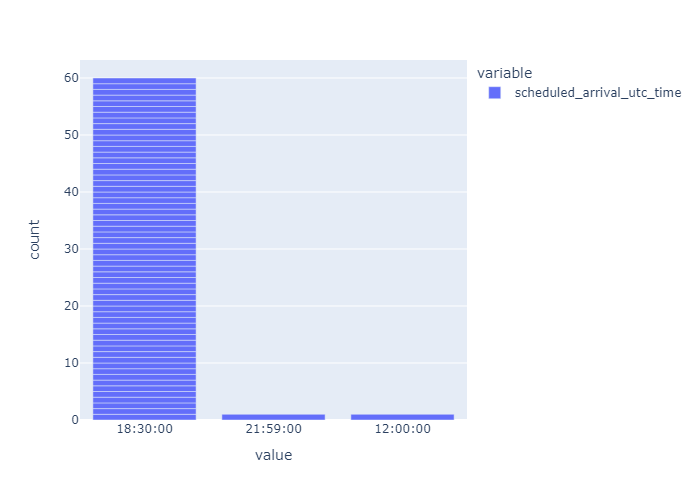

In [21]:
#Very much skewed towards particular time
fig=px.bar(df.loc[df.duplicated(subset = ['vessel_live_info_id','scheduled_arrival_utc'])].scheduled_arrival_utc_time)  
fig.show("png")

In [22]:
df.loc[df.duplicated(subset = ['vessel_live_info_id','scheduled_arrival_utc'])]\
.port_code_country_initials.value_counts()

IN    60
PA     1
US     1
Name: port_code_country_initials, dtype: int64

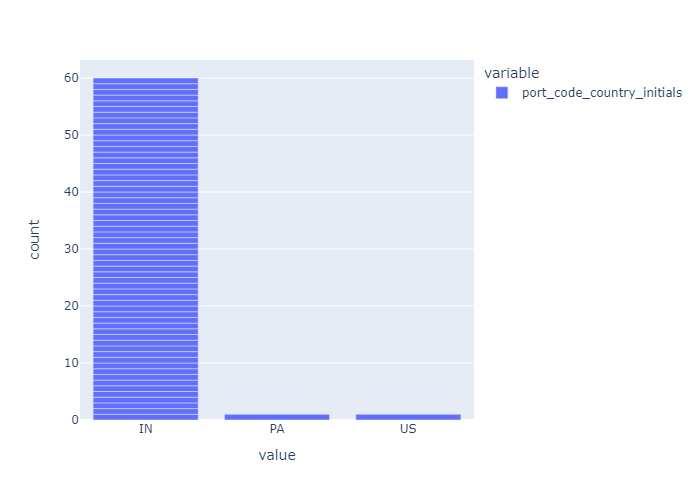

In [23]:
#Very much skewed towards particular region
fig=px.bar(df.loc[df.duplicated(subset = ['vessel_live_info_id','scheduled_arrival_utc'])].port_code_country_initials)  
fig.show('png')

#### These specific schedule data which has been sourced with 'IN'portcode initials which signifies country of origin with 18:30 as common time for all the duplicated pair is clearly a major error.

In [24]:
df.query("vessel_live_info_id == '90d90a2b-cfa4-4ad3-931e-4551206cb86e'")

,vessel_live_info_id,timestamp_utc,scheduled_arrival_utc,estimated_arrival_utc,imo,port_code,actual_arrival_utc,scheduled_arrival_utc_time,port_code_country_initials
3184,90d90a2b-cfa4-4ad3-931e-4551206cb86e,2021-09-01 00:30:07+00:00,2021-09-07 18:30:00+00:00,2021-09-03 20:56:00.328220+00:00,9393307,INNSA,2021-09-03 10:34:45+00:00,18:30:00,IN
3185,90d90a2b-cfa4-4ad3-931e-4551206cb86e,2021-09-01 00:30:07+00:00,2021-09-07 18:30:00+00:00,2021-09-03 21:10:53.966701+00:00,9393307,INNSA,2021-09-03 10:34:45+00:00,18:30:00,IN


In [25]:
df.query("vessel_live_info_id == '240ab714-d353-417f-9844-2c560d95fdfc'")
#these duplicates have the same scheduled data but different estimation

,vessel_live_info_id,timestamp_utc,scheduled_arrival_utc,estimated_arrival_utc,imo,port_code,actual_arrival_utc,scheduled_arrival_utc_time,port_code_country_initials
251,240ab714-d353-417f-9844-2c560d95fdfc,2021-07-25 04:12:14+00:00,2021-08-27 21:59:00+00:00,2021-09-03 15:40:53.799115+00:00,9359038,PAPCN,2021-09-01 11:33:00+00:00,21:59:00,PA
252,240ab714-d353-417f-9844-2c560d95fdfc,2021-07-25 04:12:14+00:00,2021-08-27 21:59:00+00:00,2021-09-03 05:14:45.554391+00:00,9359038,PAPCN,2021-09-01 11:33:00+00:00,21:59:00,PA
253,240ab714-d353-417f-9844-2c560d95fdfc,2021-07-25 04:12:14+00:00,2021-09-15 12:00:00+00:00,2021-09-19 04:55:52.866378+00:00,9359038,USNYC,2021-09-09 14:05:08+00:00,12:00:00,US
254,240ab714-d353-417f-9844-2c560d95fdfc,2021-07-25 04:12:14+00:00,2021-09-15 12:00:00+00:00,2021-09-18 22:31:54.259988+00:00,9359038,USNYC,2021-09-09 14:05:08+00:00,12:00:00,US


#### Removing these specific Duplicates

In [26]:
df = df.loc[~df.duplicated(subset = ['vessel_live_info_id','scheduled_arrival_utc'])].reset_index(drop=True).copy()
#removing these 62 duplicates which has also the same port and actual arrival data
df.head(5)

,vessel_live_info_id,timestamp_utc,scheduled_arrival_utc,estimated_arrival_utc,imo,port_code,actual_arrival_utc,scheduled_arrival_utc_time,port_code_country_initials
0,4e1582e1-ea33-4977-b84e-886f0095bee4,2021-07-02 02:32:29+00:00,2021-09-05 18:30:00+00:00,2021-08-07 13:50:21.965794+00:00,9393307,INMUN,2021-08-31 08:45:09.540000+00:00,18:30:00,IN
1,a0b4c72a-a7ec-4888-b513-77c837b0b82d,2021-07-03 03:17:16+00:00,2021-09-05 18:30:00+00:00,2021-08-07 06:24:55.229106+00:00,9393307,INMUN,2021-08-31 08:45:09.540000+00:00,18:30:00,IN
2,4947dc14-3471-48bc-bee1-7ba82e301182,2021-07-04 02:53:17+00:00,2021-09-05 18:30:00+00:00,2021-08-07 20:52:36.357922+00:00,9393307,INMUN,2021-08-31 08:45:09.540000+00:00,18:30:00,IN
3,f90f626f-1933-4c46-8749-947c2a246e0b,2021-07-04 23:55:04+00:00,2021-09-05 18:30:00+00:00,2021-08-08 16:25:14.146273+00:00,9393307,INMUN,2021-08-31 08:45:09.540000+00:00,18:30:00,IN
4,7ff01141-9dab-41ef-b1b7-70abc29df3ea,2021-07-06 00:33:44+00:00,2021-09-05 18:30:00+00:00,2021-08-08 15:46:31.015292+00:00,9393307,INMUN,2021-08-31 08:45:09.540000+00:00,18:30:00,IN


#### 2.2.3 From the Subset Pair of 'vessel_live_info_id' and 'port_code'

In [27]:
df.loc[df.duplicated(subset = ['vessel_live_info_id','port_code'])]\
.port_code_country_initials.value_counts()

MU    74
SG    53
NL    48
ES     5
Name: port_code_country_initials, dtype: int64

In [28]:
df.loc[df.duplicated(subset = ['vessel_live_info_id','port_code'])]\
.scheduled_arrival_utc_time.value_counts()

02:00:00    98
22:00:00    48
12:00:00    29
14:00:00     5
Name: scheduled_arrival_utc_time, dtype: int64

In [29]:
#these are fairly distributed in terms of 'vessel_live_info_id' and'port_code'

In [30]:
df.duplicated(subset = ['vessel_live_info_id','port_code']).sum()

180

In [31]:
df.loc[df.duplicated(subset = ['vessel_live_info_id','port_code'])].tail(5)

,vessel_live_info_id,timestamp_utc,scheduled_arrival_utc,estimated_arrival_utc,imo,port_code,actual_arrival_utc,scheduled_arrival_utc_time,port_code_country_initials
5995,f09815d2-361d-4289-bd06-4c5edbfe2268,2021-09-19 02:31:09+00:00,2021-09-20 22:00:00+00:00,2021-09-27 20:31:51.607990+00:00,9461398,NLRTM,2021-09-20 23:40:17.560000+00:00,22:00:00,NL
6024,5b24d831-d57e-44d1-b62b-93ffc674751f,2021-09-19 12:00:08+00:00,2021-09-20 22:00:00+00:00,2021-09-27 18:17:58.663519+00:00,9461398,NLRTM,2021-09-20 23:40:17.560000+00:00,22:00:00,NL
6049,5c16ff55-450f-4d69-b567-6815e35160cf,2021-09-20 09:31:59+00:00,2021-09-20 22:00:00+00:00,2021-09-28 18:43:19.292243+00:00,9461398,NLRTM,2021-09-20 23:40:17.560000+00:00,22:00:00,NL
6075,5bfdd5bd-572a-4fcc-a875-26bb24205add,2021-09-20 15:37:59+00:00,2021-09-20 22:00:00+00:00,2021-09-29 05:28:19.745649+00:00,9461398,NLRTM,2021-09-20 23:40:17.560000+00:00,22:00:00,NL
6095,a38f3a22-e55f-4b14-8df8-846043314330,2021-09-20 21:45:39+00:00,2021-09-20 22:00:00+00:00,2021-09-28 22:49:38.074557+00:00,9461398,NLRTM,2021-09-20 23:40:17.560000+00:00,22:00:00,NL


In [32]:
df.query("vessel_live_info_id == '93451975-1133-4936-ae1a-53ea6fa446a5'")#Looking into specific instance

,vessel_live_info_id,timestamp_utc,scheduled_arrival_utc,estimated_arrival_utc,imo,port_code,actual_arrival_utc,scheduled_arrival_utc_time,port_code_country_initials
681,93451975-1133-4936-ae1a-53ea6fa446a5,2021-08-06 15:54:14+00:00,2021-08-28 12:00:00+00:00,2021-08-29 04:33:13.755346+00:00,9316373,SGSIN,2021-09-01 17:32:37+00:00,12:00:00,SG
682,93451975-1133-4936-ae1a-53ea6fa446a5,2021-08-06 15:54:14+00:00,2021-09-02 03:00:00+00:00,2021-09-01 19:12:58.575535+00:00,9316373,IDJKT,2021-09-05 05:30:28+00:00,03:00:00,ID
683,93451975-1133-4936-ae1a-53ea6fa446a5,2021-08-06 15:54:14+00:00,2021-09-18 02:00:00+00:00,2021-09-18 03:58:05.521549+00:00,9316373,SGSIN,2021-09-01 17:30:07+00:00,02:00:00,SG


#### Same Port and Same Actual Arrival Datetime for the Same ID makes it an Error

In [33]:
df.query("vessel_live_info_id == 'e9cc66be-7973-4471-b9d4-2abbce88689d'") #same instance as above

,vessel_live_info_id,timestamp_utc,scheduled_arrival_utc,estimated_arrival_utc,imo,port_code,actual_arrival_utc,scheduled_arrival_utc_time,port_code_country_initials
974,e9cc66be-7973-4471-b9d4-2abbce88689d,2021-08-09 21:25:13+00:00,2021-08-22 10:00:00+00:00,2021-08-29 22:59:14.824200+00:00,9305714,MUPLU,2021-09-03 07:05:03+00:00,10:00:00,MU
975,e9cc66be-7973-4471-b9d4-2abbce88689d,2021-08-09 21:25:13+00:00,2021-08-31 11:00:00+00:00,2021-09-06 01:11:41.717458+00:00,9305714,ZAZBA,2021-09-10 14:50:01+00:00,11:00:00,ZA
976,e9cc66be-7973-4471-b9d4-2abbce88689d,2021-08-09 21:25:13+00:00,2021-09-09 02:00:00+00:00,2021-09-13 21:18:29.053316+00:00,9305714,MUPLU,2021-09-03 07:05:03+00:00,02:00:00,MU


In [34]:
df.query("vessel_live_info_id == 'aed7117d-b164-4bcb-973d-313746dee423'")

,vessel_live_info_id,timestamp_utc,scheduled_arrival_utc,estimated_arrival_utc,imo,port_code,actual_arrival_utc,scheduled_arrival_utc_time,port_code_country_initials
5369,aed7117d-b164-4bcb-973d-313746dee423,2021-09-12 00:50:12+00:00,2021-09-14 22:00:00+00:00,2021-09-18 19:39:46.767874+00:00,9461398,NLRTM,2021-09-20 23:40:17.560000+00:00,22:00:00,NL
5370,aed7117d-b164-4bcb-973d-313746dee423,2021-09-12 00:50:12+00:00,2021-09-16 15:00:00+00:00,2021-09-21 06:10:15.138815+00:00,9461398,DEHAM,2021-09-23 04:36:14+00:00,15:00:00,DE
5371,aed7117d-b164-4bcb-973d-313746dee423,2021-09-12 00:50:12+00:00,2021-09-13 23:00:00+00:00,2021-09-16 09:50:22.444768+00:00,9461398,GBFXT,2021-09-16 15:35:38.320000+00:00,23:00:00,GB
5373,aed7117d-b164-4bcb-973d-313746dee423,2021-09-12 00:50:12+00:00,2021-09-20 22:00:00+00:00,2021-09-26 10:09:13.667024+00:00,9461398,NLRTM,2021-09-20 23:40:17.560000+00:00,22:00:00,NL


#### Removing these specific Duplicates

In [35]:
df = df.loc[~df.duplicated(subset = ['vessel_live_info_id','port_code'],keep ='last')].reset_index(drop=True).copy()
#removing these specific duplicates with same 'actual_arrival_utc','port_code' and 'vessel_live_info_id' since these are duplicates
df.head(5)

,vessel_live_info_id,timestamp_utc,scheduled_arrival_utc,estimated_arrival_utc,imo,port_code,actual_arrival_utc,scheduled_arrival_utc_time,port_code_country_initials
0,4e1582e1-ea33-4977-b84e-886f0095bee4,2021-07-02 02:32:29+00:00,2021-09-05 18:30:00+00:00,2021-08-07 13:50:21.965794+00:00,9393307,INMUN,2021-08-31 08:45:09.540000+00:00,18:30:00,IN
1,a0b4c72a-a7ec-4888-b513-77c837b0b82d,2021-07-03 03:17:16+00:00,2021-09-05 18:30:00+00:00,2021-08-07 06:24:55.229106+00:00,9393307,INMUN,2021-08-31 08:45:09.540000+00:00,18:30:00,IN
2,4947dc14-3471-48bc-bee1-7ba82e301182,2021-07-04 02:53:17+00:00,2021-09-05 18:30:00+00:00,2021-08-07 20:52:36.357922+00:00,9393307,INMUN,2021-08-31 08:45:09.540000+00:00,18:30:00,IN
3,f90f626f-1933-4c46-8749-947c2a246e0b,2021-07-04 23:55:04+00:00,2021-09-05 18:30:00+00:00,2021-08-08 16:25:14.146273+00:00,9393307,INMUN,2021-08-31 08:45:09.540000+00:00,18:30:00,IN
4,7ff01141-9dab-41ef-b1b7-70abc29df3ea,2021-07-06 00:33:44+00:00,2021-09-05 18:30:00+00:00,2021-08-08 15:46:31.015292+00:00,9393307,INMUN,2021-08-31 08:45:09.540000+00:00,18:30:00,IN


#### Dropping the First instance and keeping the Latest occurrence assuming it is being the correct data

In [36]:
df.query("vessel_live_info_id == 'aed7117d-b164-4bcb-973d-313746dee423'")

,vessel_live_info_id,timestamp_utc,scheduled_arrival_utc,estimated_arrival_utc,imo,port_code,actual_arrival_utc,scheduled_arrival_utc_time,port_code_country_initials
5209,aed7117d-b164-4bcb-973d-313746dee423,2021-09-12 00:50:12+00:00,2021-09-16 15:00:00+00:00,2021-09-21 06:10:15.138815+00:00,9461398,DEHAM,2021-09-23 04:36:14+00:00,15:00:00,DE
5210,aed7117d-b164-4bcb-973d-313746dee423,2021-09-12 00:50:12+00:00,2021-09-13 23:00:00+00:00,2021-09-16 09:50:22.444768+00:00,9461398,GBFXT,2021-09-16 15:35:38.320000+00:00,23:00:00,GB
5212,aed7117d-b164-4bcb-973d-313746dee423,2021-09-12 00:50:12+00:00,2021-09-20 22:00:00+00:00,2021-09-26 10:09:13.667024+00:00,9461398,NLRTM,2021-09-20 23:40:17.560000+00:00,22:00:00,NL


In [37]:
#checking other pairs
df.duplicated(subset = ['vessel_live_info_id','estimated_arrival_utc']).sum()

0

In [38]:
#Dropping Temporary Columns
df = df.drop(['scheduled_arrival_utc_time'], axis=1)
df = df.drop(['port_code_country_initials'], axis=1)


### Wrong Scheduled Data has been the biggest reason for wrong and multiple Predictions for the same Freight.
### Prediction results are more accurate after data cleaning and processing and still accepting the correct data.

# 3. Data Analysis

In [39]:
df['imo'].value_counts()#value counts of categorical data 'imo'

9393307    395
9619969    344
9606338    267
9777216    264
9632129    252
          ... 
9238882      7
9110377      7
9393319      6
9450935      3
9316347      1
Name: imo, Length: 68, dtype: Int64

In [40]:
df['port_code'].value_counts() #value counts of categorical data 'portcode'

CNSHG    526
INNSA    396
INMUN    385
CNYTN    300
USNYC    272
        ... 
LBBEY      9
AEJEA      7
MYTPP      6
BEANR      3
MXPGO      1
Name: port_code, Length: 67, dtype: int64

## METRICS

### a. Actual View days ahead = (ATA - pTimestamp)

In [41]:
df['Actual View(days ahead)'] = (df['actual_arrival_utc']-df['timestamp_utc']).dt.days
#days ahead so no need specific time and seconds

Actual View signifies Actual Days ahead from the Timestamp when we estimated

#### a.1 Median Absolute Error (MAE)

Median Absolute Error (MAE) Metrics is insensitive to outliers. 
This is because it is the median of all of the absolute values of the residuals,and the median is unaffected by values at the tails.


In [42]:
df['|ATA-pETA|'] = (df['actual_arrival_utc']-df['estimated_arrival_utc']).abs()
#Calculating Absolute diff b/w Actual and Estimated

In [43]:
df_av = pd.DataFrame(df.groupby(['Actual View(days ahead)'])['|ATA-pETA|'].median()) #Calculating MAE

In [44]:
df_av = df_av.rename(columns ={'|ATA-pETA|':'MAE'})


In [45]:
df_av

,MAE
Actual View(days ahead),
-3,18 days 17:44:51.754379
-2,18 days 19:25:53.218737
-1,3 days 23:20:24.600107
0,1 days 13:20:20.534997
1,1 days 06:27:31.579402
...,...
59,22 days 23:26:18.937129500
60,23 days 18:54:47.574206
77,47 days 12:54:27.864274


In [46]:
#Deleting Actual View(days ahead)<0(negative) values since ideally they dont contribute to understanding Estimation and Metrics.
#The Freight is already completed its travel and Estimating these values dont have any significant value.
#This is Wrong data which skews the metrics in unfamiliar direction.

In [47]:
df_av = df_av[~df_av.index <0]

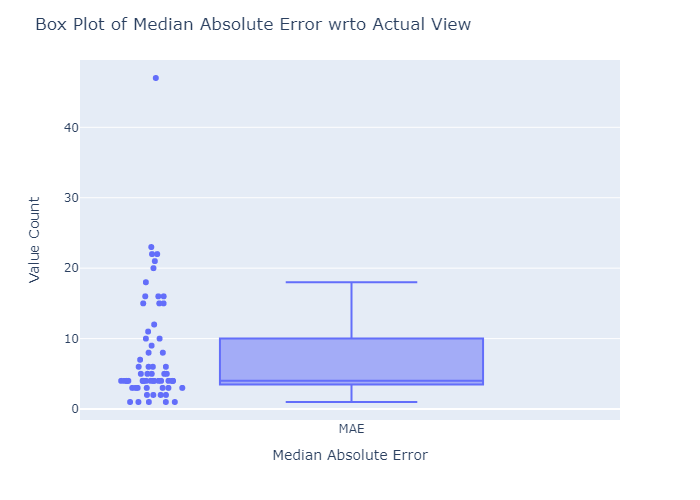

In [48]:
#Box Plot for understanding the distribution of the data
fig = px.box(df_av['MAE'].dt.days, points = 'all')
fig.update_layout(
    title="Box Plot of Median Absolute Error wrto Actual View",
    xaxis_title="Median Absolute Error",
    yaxis_title="Value Count"
    )
fig.show('png')

#### Box Plot Summarizes the Median to be 4 and more values in First Quartile.The Median Absolute Error data is also closer together.MAE is Less for closer days with Actual Days.

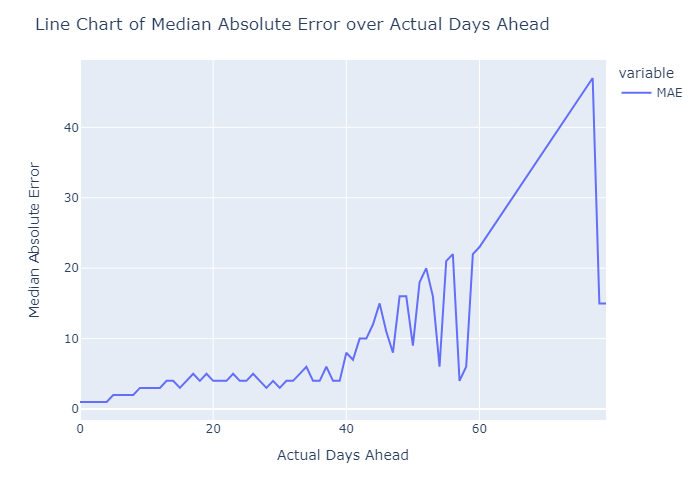

In [49]:
#Line chart for understanding MAE with respect to Actual Days Ahead
fig = px.line(df_av["MAE"].dt.days)
fig.update_layout(
    title="Line Chart of Median Absolute Error over Actual Days Ahead ",
    xaxis_title="Actual Days Ahead",
    yaxis_title="Median Absolute Error"
    )
fig.show('png')

#### Median Absolute Error increase as Actual days increases signifying more error as farther from ATA

#### a.2 On Time Percentage Arrival (OTPA)

In [50]:
x=y=3 #-3 to +3 days as the example range for OTPA

#ATA-X <= pETA <= ATA +Y
lower_bound = df['actual_arrival_utc']-timedelta(x)
upper_bound = df['actual_arrival_utc']+timedelta(y)

n_total_count_av = df.groupby('Actual View(days ahead)')['estimated_arrival_utc'].count()
n_total_count_av

In [51]:
#Boolean for the condition
df['boolean_condition'] = ( df['estimated_arrival_utc']>= (lower_bound) ) & (df['estimated_arrival_utc']<= (upper_bound) )
df['boolean_condition']

0       False
1       False
2       False
3       False
4       False
        ...  
6096     True
6097     True
6098     True
6099     True
6100     True
Name: boolean_condition, Length: 6101, dtype: bool

In [52]:
df

,vessel_live_info_id,timestamp_utc,scheduled_arrival_utc,estimated_arrival_utc,imo,port_code,actual_arrival_utc,Actual View(days ahead),|ATA-pETA|,boolean_condition
0,4e1582e1-ea33-4977-b84e-886f0095bee4,2021-07-02 02:32:29+00:00,2021-09-05 18:30:00+00:00,2021-08-07 13:50:21.965794+00:00,9393307,INMUN,2021-08-31 08:45:09.540000+00:00,60,23 days 18:54:47.574206,False
1,a0b4c72a-a7ec-4888-b513-77c837b0b82d,2021-07-03 03:17:16+00:00,2021-09-05 18:30:00+00:00,2021-08-07 06:24:55.229106+00:00,9393307,INMUN,2021-08-31 08:45:09.540000+00:00,59,24 days 02:20:14.310894,False
2,4947dc14-3471-48bc-bee1-7ba82e301182,2021-07-04 02:53:17+00:00,2021-09-05 18:30:00+00:00,2021-08-07 20:52:36.357922+00:00,9393307,INMUN,2021-08-31 08:45:09.540000+00:00,58,23 days 11:52:33.182078,False
3,f90f626f-1933-4c46-8749-947c2a246e0b,2021-07-04 23:55:04+00:00,2021-09-05 18:30:00+00:00,2021-08-08 16:25:14.146273+00:00,9393307,INMUN,2021-08-31 08:45:09.540000+00:00,57,22 days 16:19:55.393727,False
4,7ff01141-9dab-41ef-b1b7-70abc29df3ea,2021-07-06 00:33:44+00:00,2021-09-05 18:30:00+00:00,2021-08-08 15:46:31.015292+00:00,9393307,INMUN,2021-08-31 08:45:09.540000+00:00,56,22 days 16:58:38.524708,False
...,...,...,...,...,...,...,...,...,...,...
6096,61f2aa93-aa8b-4b4e-b827-c510f50cb773,2021-09-27 22:32:04+00:00,2021-09-23 16:00:00+00:00,2021-09-28 09:43:08.975365+00:00,9229324,CNYTN,2021-09-28 20:52:06.110000+00:00,0,0 days 11:08:57.134635,True
6097,b7092cac-ff73-46b0-90d2-fab50047d1aa,2021-09-28 00:10:03+00:00,2021-09-22 16:00:00+00:00,2021-09-28 22:00:29.220478+00:00,9606314,CNSHG,2021-09-29 00:18:54.230000+00:00,1,0 days 02:18:25.009522,True
6098,4675431b-c8e9-49c4-80a8-db87f41e6bdf,2021-09-28 04:44:10+00:00,2021-09-23 16:00:00+00:00,2021-09-28 08:32:12.671424+00:00,9229324,CNYTN,2021-09-28 20:52:06.110000+00:00,0,0 days 12:19:53.438576,True
6099,0b1f12c6-fe6f-4811-85c1-bc360f625fd2,2021-09-28 16:07:03+00:00,2021-09-22 16:00:00+00:00,2021-09-29 16:08:45.330866+00:00,9606314,CNSHG,2021-09-29 00:18:54.230000+00:00,0,0 days 15:49:51.100866,True


In [53]:
df_av_otpa = df.groupby('Actual View(days ahead)')['boolean_condition'].apply(lambda x: (x==True).sum()).reset_index(name='count')

In [54]:
df_av_otpa = df_av_otpa.set_index("Actual View(days ahead)")

In [55]:
df_av_otpa = df_av_otpa[~df_av_otpa.index <0]
df_av_otpa.index

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 77, 78, 79],
           dtype='int64', name='Actual View(days ahead)')

In [56]:
#n = Total count of values satisfying the condition
n_av = df.groupby('Actual View(days ahead)')['boolean_condition'].count()
n_av.rename('n',inplace=True)

Actual View(days ahead)
-3       3
-2       4
-1      11
 0     236
 1     227
      ... 
 59      2
 60      1
 77      3
 78      3
 79      2
Name: n, Length: 67, dtype: int64

In [57]:
n_av.index

Int64Index([-3, -2, -1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13,
            14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30,
            31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47,
            48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 77, 78, 79],
           dtype='int64', name='Actual View(days ahead)')

In [58]:
n_av = n_av[~n_av.index <0]

In [59]:
#df_pv_otpa = pd.concat([df_pv_otpa, n_pv], axis=1, join="inner")
df_av_otpa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64 entries, 0 to 79
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   count   64 non-null     int64
dtypes: int64(1)
memory usage: 1.0 KB


In [60]:
df_av_otpa['OTPA'] = 100*df_av_otpa['count']/n_av
df_av_otpa

,count,OTPA
Actual View(days ahead),,
0,143,60.593220
1,142,62.555066
2,156,68.421053
3,160,69.868996
4,152,69.090909
...,...,...
59,0,0.000000
60,0,0.000000
77,0,0.000000


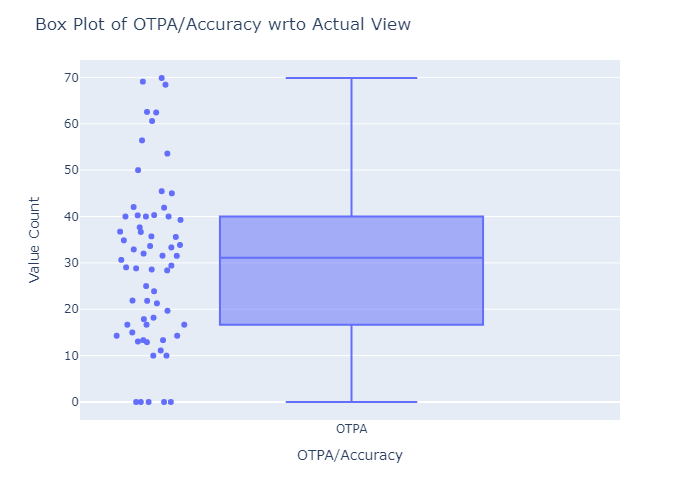

In [61]:
#Box Plot for understanding the distribution of the OTPA data
fig = px.box(df_av_otpa['OTPA'], points = 'all')
fig.update_layout(
    title="Box Plot of OTPA/Accuracy wrto Actual View",
    xaxis_title="OTPA/Accuracy",
    yaxis_title="Value Count"
    )
fig.show('png')

#### Box Plot Summarizes the Median to be around 31 and more values in First Quartile

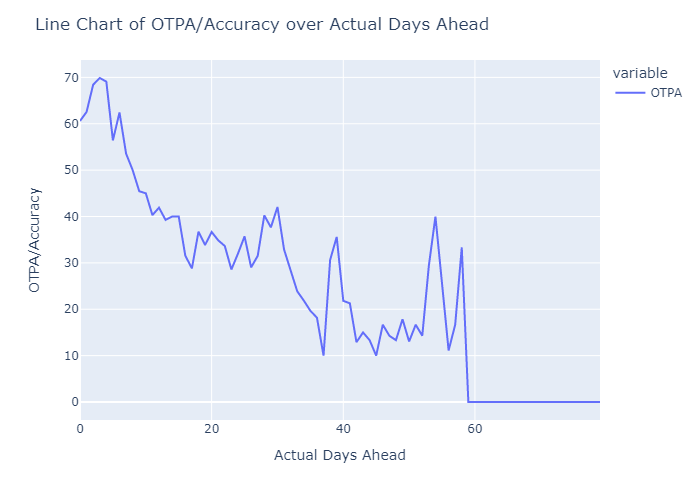

In [62]:
#Line chart for understanding OTPA/Accuracy with respect to Actual Days Ahead
fig = px.line(df_av_otpa['OTPA'])
fig.update_layout(
    title="Line Chart of OTPA/Accuracy over Actual Days Ahead ",
    xaxis_title="Actual Days Ahead",
    yaxis_title="OTPA/Accuracy"
    )
fig.show('png')


#### The Line Chart summarizes Better 'OTPA/Accuracy' with minimum "Actual Days Ahead"

### b. Prediction View days ahead = (pETA - pTimestamp)

In [63]:
df['Prediction View(days ahead)'] = (df['estimated_arrival_utc']-df['timestamp_utc']).dt.days

#### b.1 Median Absolute Error (MAE)

In [64]:
df_pv = pd.DataFrame(df.groupby(['Prediction View(days ahead)'])['|ATA-pETA|'].median())
df_pv.index

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52, 53, 54, 55, 56, 57, 59, 63, 95, 96],
           dtype='int64', name='Prediction View(days ahead)')

In [65]:
df_pv = df_pv.rename(columns ={'|ATA-pETA|':'MAE'})

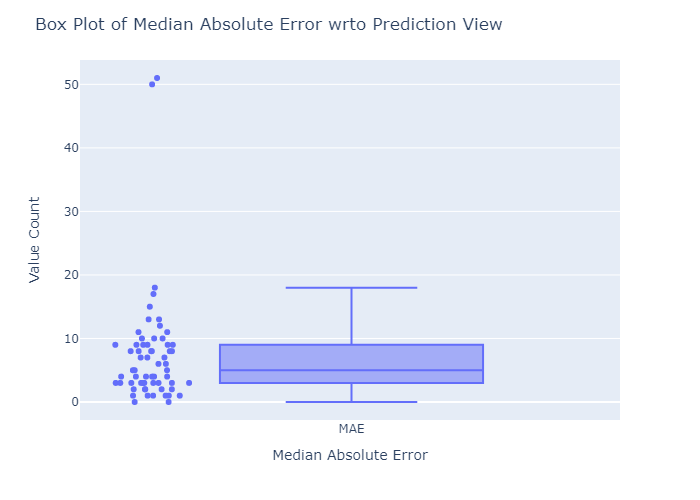

In [66]:
fig = px.box(df_pv['MAE'].dt.days, points = 'all')
fig.update_layout(
    title="Box Plot of Median Absolute Error wrto Prediction View",
    xaxis_title="Median Absolute Error",
    yaxis_title="Value Count"
    )
fig.show('png')

#### Box Plot Summarizes the Median to be 5 .The Median Absolute Error data is also closer together.

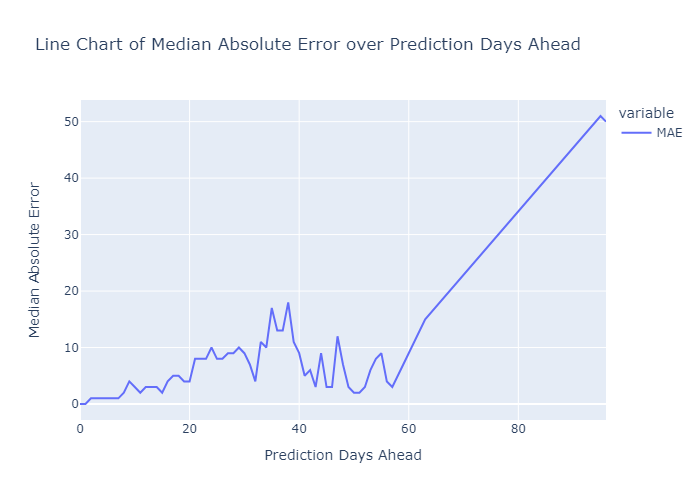

In [67]:
fig = px.line(df_pv["MAE"].dt.days, title='MAE over Prediction Days Ahead')
fig.update_layout(
    title="Line Chart of Median Absolute Error over Prediction Days Ahead ",
    xaxis_title="Prediction Days Ahead",
    yaxis_title="Median Absolute Error"
    )
fig.show('png')

#### b.2 On Time Percentage Arrival (OTPA)/Accuracy

In [68]:
n_total_count_pv = df.groupby('Prediction View(days ahead)')['estimated_arrival_utc'].count()
n_total_count_pv

Prediction View(days ahead)
0     142
1     173
2     194
3     206
4     261
     ... 
57      1
59      1
63      4
95      3
96      1
Name: estimated_arrival_utc, Length: 62, dtype: int64

In [69]:
df

,vessel_live_info_id,timestamp_utc,scheduled_arrival_utc,estimated_arrival_utc,imo,port_code,actual_arrival_utc,Actual View(days ahead),|ATA-pETA|,boolean_condition,Prediction View(days ahead)
0,4e1582e1-ea33-4977-b84e-886f0095bee4,2021-07-02 02:32:29+00:00,2021-09-05 18:30:00+00:00,2021-08-07 13:50:21.965794+00:00,9393307,INMUN,2021-08-31 08:45:09.540000+00:00,60,23 days 18:54:47.574206,False,36
1,a0b4c72a-a7ec-4888-b513-77c837b0b82d,2021-07-03 03:17:16+00:00,2021-09-05 18:30:00+00:00,2021-08-07 06:24:55.229106+00:00,9393307,INMUN,2021-08-31 08:45:09.540000+00:00,59,24 days 02:20:14.310894,False,35
2,4947dc14-3471-48bc-bee1-7ba82e301182,2021-07-04 02:53:17+00:00,2021-09-05 18:30:00+00:00,2021-08-07 20:52:36.357922+00:00,9393307,INMUN,2021-08-31 08:45:09.540000+00:00,58,23 days 11:52:33.182078,False,34
3,f90f626f-1933-4c46-8749-947c2a246e0b,2021-07-04 23:55:04+00:00,2021-09-05 18:30:00+00:00,2021-08-08 16:25:14.146273+00:00,9393307,INMUN,2021-08-31 08:45:09.540000+00:00,57,22 days 16:19:55.393727,False,34
4,7ff01141-9dab-41ef-b1b7-70abc29df3ea,2021-07-06 00:33:44+00:00,2021-09-05 18:30:00+00:00,2021-08-08 15:46:31.015292+00:00,9393307,INMUN,2021-08-31 08:45:09.540000+00:00,56,22 days 16:58:38.524708,False,33
...,...,...,...,...,...,...,...,...,...,...,...
6096,61f2aa93-aa8b-4b4e-b827-c510f50cb773,2021-09-27 22:32:04+00:00,2021-09-23 16:00:00+00:00,2021-09-28 09:43:08.975365+00:00,9229324,CNYTN,2021-09-28 20:52:06.110000+00:00,0,0 days 11:08:57.134635,True,0
6097,b7092cac-ff73-46b0-90d2-fab50047d1aa,2021-09-28 00:10:03+00:00,2021-09-22 16:00:00+00:00,2021-09-28 22:00:29.220478+00:00,9606314,CNSHG,2021-09-29 00:18:54.230000+00:00,1,0 days 02:18:25.009522,True,0
6098,4675431b-c8e9-49c4-80a8-db87f41e6bdf,2021-09-28 04:44:10+00:00,2021-09-23 16:00:00+00:00,2021-09-28 08:32:12.671424+00:00,9229324,CNYTN,2021-09-28 20:52:06.110000+00:00,0,0 days 12:19:53.438576,True,0
6099,0b1f12c6-fe6f-4811-85c1-bc360f625fd2,2021-09-28 16:07:03+00:00,2021-09-22 16:00:00+00:00,2021-09-29 16:08:45.330866+00:00,9606314,CNSHG,2021-09-29 00:18:54.230000+00:00,0,0 days 15:49:51.100866,True,1


In [70]:
df_pv_otpa = df.groupby('Prediction View(days ahead)')['boolean_condition'].apply(lambda x: (x==True).sum()).reset_index(name='count')

In [71]:
df_pv_otpa = df_pv_otpa.set_index("Prediction View(days ahead)")

In [72]:
n_pv = df.groupby('Prediction View(days ahead)')['boolean_condition'].count()
n_pv.rename('n',inplace=True)

Prediction View(days ahead)
0     142
1     173
2     194
3     206
4     261
     ... 
57      1
59      1
63      4
95      3
96      1
Name: n, Length: 62, dtype: int64

In [73]:
df_pv_otpa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 0 to 96
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   count   62 non-null     int64
dtypes: int64(1)
memory usage: 992.0 bytes


In [74]:
df_pv_otpa.head(5)

,count
Prediction View(days ahead),
0,136
1,155
2,172
3,156
4,170


In [75]:
df_pv_otpa['OTPA'] = (100*df_pv_otpa['count']/n_pv)
df_pv_otpa

,count,OTPA
Prediction View(days ahead),,
0,136,95.774648
1,155,89.595376
2,172,88.659794
3,156,75.728155
4,170,65.134100
...,...,...
57,0,0.000000
59,0,0.000000
63,0,0.000000


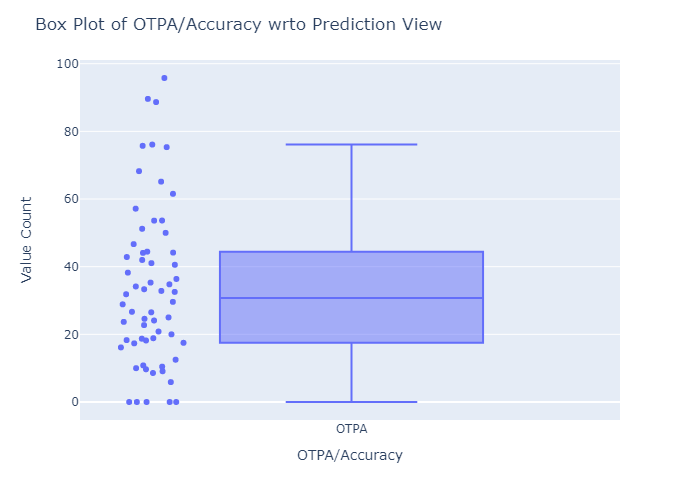

In [76]:
fig = px.box(df_pv_otpa['OTPA'], points = 'all')
fig.update_layout(
    title="Box Plot of OTPA/Accuracy wrto Prediction View",
    xaxis_title="OTPA/Accuracy",
    yaxis_title="Value Count"
    )
fig.show('png')

#### Box Plot Summarizes the OTPA/Accuracy Median to be around 30 and OTPA/Accuracy are values fairly distributed in all Quartiles signifying no extreme data points to make any relevant conclusion.

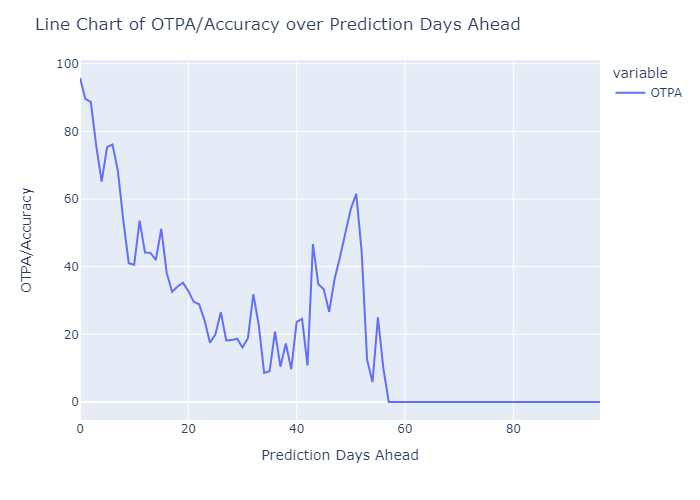

In [77]:
fig = px.line(df_pv_otpa['OTPA'])
fig.update_layout(
    title="Line Chart of OTPA/Accuracy over Prediction Days Ahead ",
    xaxis_title="Prediction Days Ahead",
    yaxis_title="OTPA/Accuracy")
    
fig.show('png')

#### The Line Chart summarizes Better 'OTPA/Accuracy' with minimum "Prediction Days Ahead"

#### Box plot helps to understand distribution of data .it provides ranges, quartile and median values whereas Line Charts visualizes trajectory wrto days ahead.Both have very distinguished features which together helps to understand data better.


# Comparing Accuracy wrto Actual and Prediction Days

### Median Absolute Error

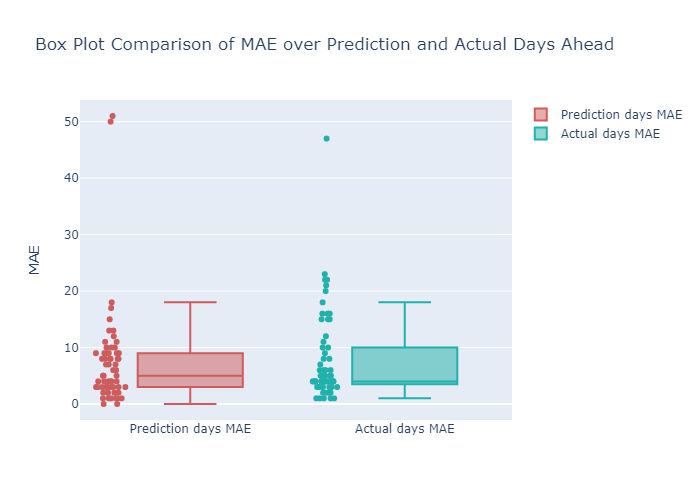

In [78]:
fig = go.Figure()
fig.add_trace(go.Box(y=df_pv['MAE'].dt.days, name='Prediction days MAE',
                marker_color = 'indianred',boxpoints='all'
                     #,boxpoints='all' = 'all'
                    ))
fig.add_trace(go.Box(y=df_av['MAE'].dt.days, name = 'Actual days MAE',
                marker_color = 'lightseagreen',boxpoints='all'
                     #,points = 'all'
                    ))
fig.update_layout(
    title="Box Plot Comparison of MAE over Prediction and Actual Days Ahead",
    #xaxis_title="PDays Ahead",
    yaxis_title="MAE")

fig.show('png')

#### Median Absolute Error wrto Actual Days has generally higher values and much more distributed in comparison to Prediction Days.


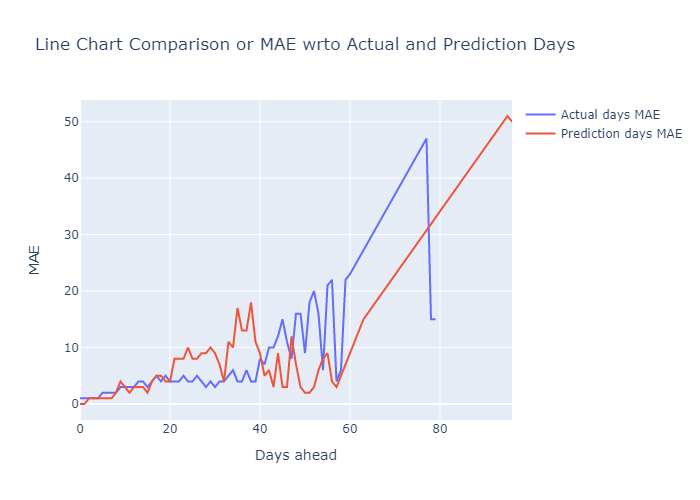

In [79]:

fig = go.Figure()

fig.add_trace(go.Scatter(x=df_av.index, y=df_av['MAE'].dt.days,
                    mode='lines',
                    name='Actual days MAE'))
fig.add_trace(go.Scatter(x=df_pv.index, y=df_pv['MAE'].dt.days,
                    mode='lines',
                    name='Prediction days MAE'))
fig.update_layout(
    title="Line Chart Comparison or MAE wrto Actual and Prediction Days",
    xaxis_title="Days ahead",
    yaxis_title="MAE"
    )

fig.show('png')

### After Observing this,We can Conclude Prediction MAE Error is less when we predict vessel is going to arrive after 40 or more days

### OTPA/Accuracy

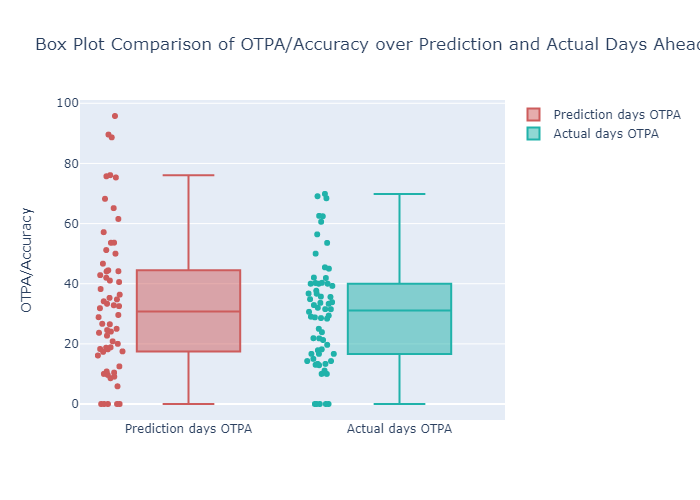

In [80]:
fig = go.Figure()
fig.add_trace(go.Box(y=df_pv_otpa['OTPA'],name='Prediction days OTPA',
                marker_color = 'indianred',boxpoints='all'
                     #,boxpoints='all' = 'all'
                    ))
fig.add_trace(go.Box(y=df_av_otpa['OTPA'],name = 'Actual days OTPA',
                marker_color = 'lightseagreen',boxpoints='all'
                     #,points = 'all'
                    ))
fig.update_layout(
    title="Box Plot Comparison of OTPA/Accuracy over Prediction and Actual Days Ahead",
    #xaxis_title="PDays Ahead",
    yaxis_title="OTPA/Accuracy")


fig.show('png')

#### OTPA/Accuracy wrto Prediction Days has generally higher values which means better accuracy and much more distributed in comparison to Actual Days.

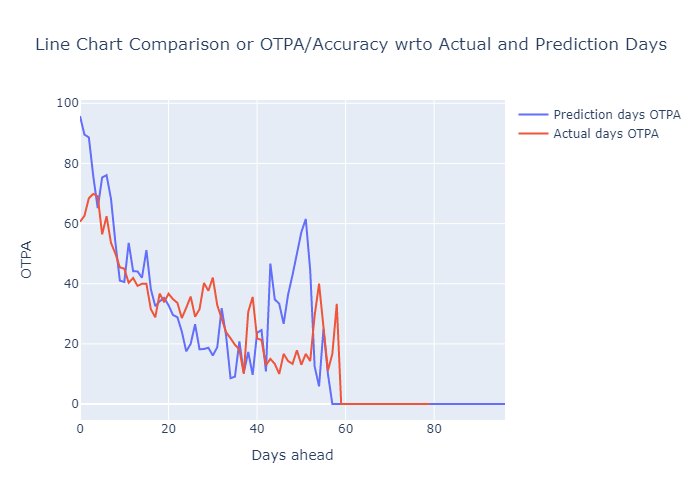

In [81]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=df_pv_otpa.index, y=df_pv_otpa['OTPA'],
                    mode='lines',
                    name='Prediction days OTPA'))
fig.add_trace(go.Scatter(x=df_av_otpa.index, y=df_av_otpa['OTPA'],
                    mode='lines',
                    name='Actual days OTPA'))
fig.update_layout(
    title="Line Chart Comparison or OTPA/Accuracy wrto Actual and Prediction Days",
    xaxis_title="Days ahead",
    yaxis_title="OTPA"
    )

fig.show('png')

#### OTPA/Accuracy is higher and better wrto Actual days under 40 days timeline .Later on Prediction days OTPA takes over and have better accuracy.

## Conclusion:

### After Observing these Visualizations ,We can Conclude Predictions are much more accurate when we predict vessel is going to arrive after 40 or more days . This Also Correlate with Prediction MAE Error which is lesser when we predict vessel is going to arrive after 40 or more days  through the Line Charts.